# Import libraries & loading dataset

## Mount Google Drive storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/FFS/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/FFS


In [ ]:
!pip install --upgrade vaex

## Loading dataset

In [ ]:
import vaex
data = vaex.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

#     id  gender      age    hypertension    heart_disease  ever_married    work_type      Residence_type      avg_glucose_level    bmi  smoking_status      stroke
  0   9046  Male         67               0                1  Yes             Private        Urban                          228.69   36.6  formerly smoked          1
  1  51676  Female       61               0                0  Yes             Self-employed  Rural                          202.21  nan    never smoked             1
  2  31112  Male         80               0                1  Yes             Private        Rural                          105.92   32.5  never smoked             1
  3  60182  Female       49               0                0  Yes             Private        Urban                          171.23   34.4  smokes                   1
  4   1665  Female       79               1                0  Yes             Self-employed  Rural                          174.12   24    never smoked             1
  5  56669  Male         81               0                0  Yes             Private        Urban                          186.21   29    formerly smoked          1
  6  53882  Male         74               1                1  Yes             Private        Rural                           70.09   27.4  never smoked             1
  7  10434  Female       69               0                0  No              Private        Urban                           94.39   22.8  never smoked             1
  8  27419  Female       59               0                0  Yes             Private        Rural                           76.15  nan    Unknown                  1
  9  60491  Female       78               0                0  Yes             Private        Urban                           58.57   24.2  Unknown                  1

# Dataset Overview

In [ ]:
data.shape

(5110, 12)

In [ ]:
data.describe()

id  gender                 age        hypertension  \
data_type              int64  string             float64               int64   
count                   5110    5110                5110                5110   
NA                         0       0                   0                   0   
mean       36517.82935420744      --  43.226614481409015  0.0974559686888454   
std             21159.650905      --           22.610434            0.296578   
min                       67      --                0.08                   0   
max                    72940      --                82.0                   1   

                 heart_disease ever_married work_type Residence_type  \
data_type                int64       string    string         string   
count                     5110         5110      5110           5110   
NA                           0            0         0              0   
mean       0.05401174168297456           --        --             --   
std                   0.226041           --        --             --   
min                          0           --        --             --   
max                          1           --        --             --   

            avg_glucose_level                 bmi smoking_status  \
data_type             float64             float64         string   
count                    5110                4909           5110   
NA                          0                 201              0   
mean       106.14767710371804  28.893236911794673             --   
std                 45.279129            7.853267             --   
min                     55.12                10.3             --   
max                    271.74                97.6             --   

                       stroke  
data_type               int64  
count                    5110  
NA                          0  
mean       0.0487279843444227  
std                  0.215299  
min                         0  
max                         1

In [ ]:
data.info()

In [ ]:
con_cols=['age', 'avg_glucose_level', 'bmi']
cat_cols=[]
for ft in data.columns:
    if ft!='id' and ft!='stroke' and ft not in con_cols:
        cat_cols.append(ft)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
# Checking value in each categorical column
for ft in cat_cols:
    print(f'============Values in {ft}============\n{data[ft].value_counts()}\n--------------------------------')

============Values in gender============
Female    2994
Male      2115
Other        1
dtype: int64
--------------------------------
============Values in hypertension============
0    4612
1     498
dtype: int64
--------------------------------
============Values in heart_disease============
0    4834
1     276
dtype: int64
--------------------------------
============Values in ever_married============
Yes    3353
No     1757
dtype: int64
--------------------------------
============Values in work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64
--------------------------------
============Values in Residence_type============
Urban    2596
Rural    2514
dtype: int64
--------------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64
--------------------------------


In [ ]:
data = data[data.gender != 'Other']

for ft in cat_cols:
    print(f'============Values in {ft}============\n{data[ft].value_counts()}\n------------------------')

============Values in gender============
Female    2994
Male      2115
dtype: int64
------------------------
============Values in hypertension============
0    4611
1     498
dtype: int64
------------------------
============Values in heart_disease============
0    4833
1     276
dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1756
dtype: int64
------------------------
============Values in work_type============
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64
------------------------
============Values in Residence_type============
Urban    2596
Rural    2513
dtype: int64
------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
dtype: int64
------------------------


# Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
def plot_stroke_distribution(title, value_counts):
    plt.figure(figsize=(4, 4))
    plt.title(title)
    plt.bar(value_counts.index, value_counts.values, color=['mediumblue', 'orangered'])

    for i, v in enumerate(value_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(value_counts.index, ['Non Stroke', 'Stroke'])

    plt.show()

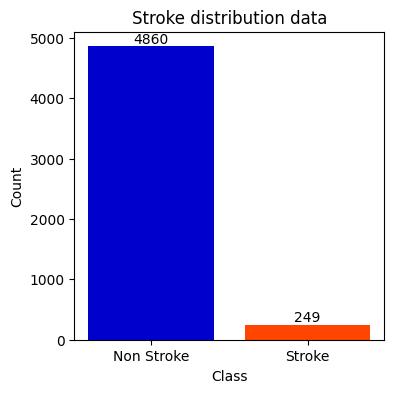

In [ ]:
plot_stroke_distribution("Stroke distribution data", data['stroke'].value_counts())

##Single & dual variable data visualization

In [ ]:
# Convert from Vaex dataframe to Pandas dataframe for the sake of data visualization
import pandas as pd
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.drop(index = data[data['gender']=='Other'].index[0], axis = 0, inplace = True)
# data.drop('id', axis='columns', inplace=True)

In [ ]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

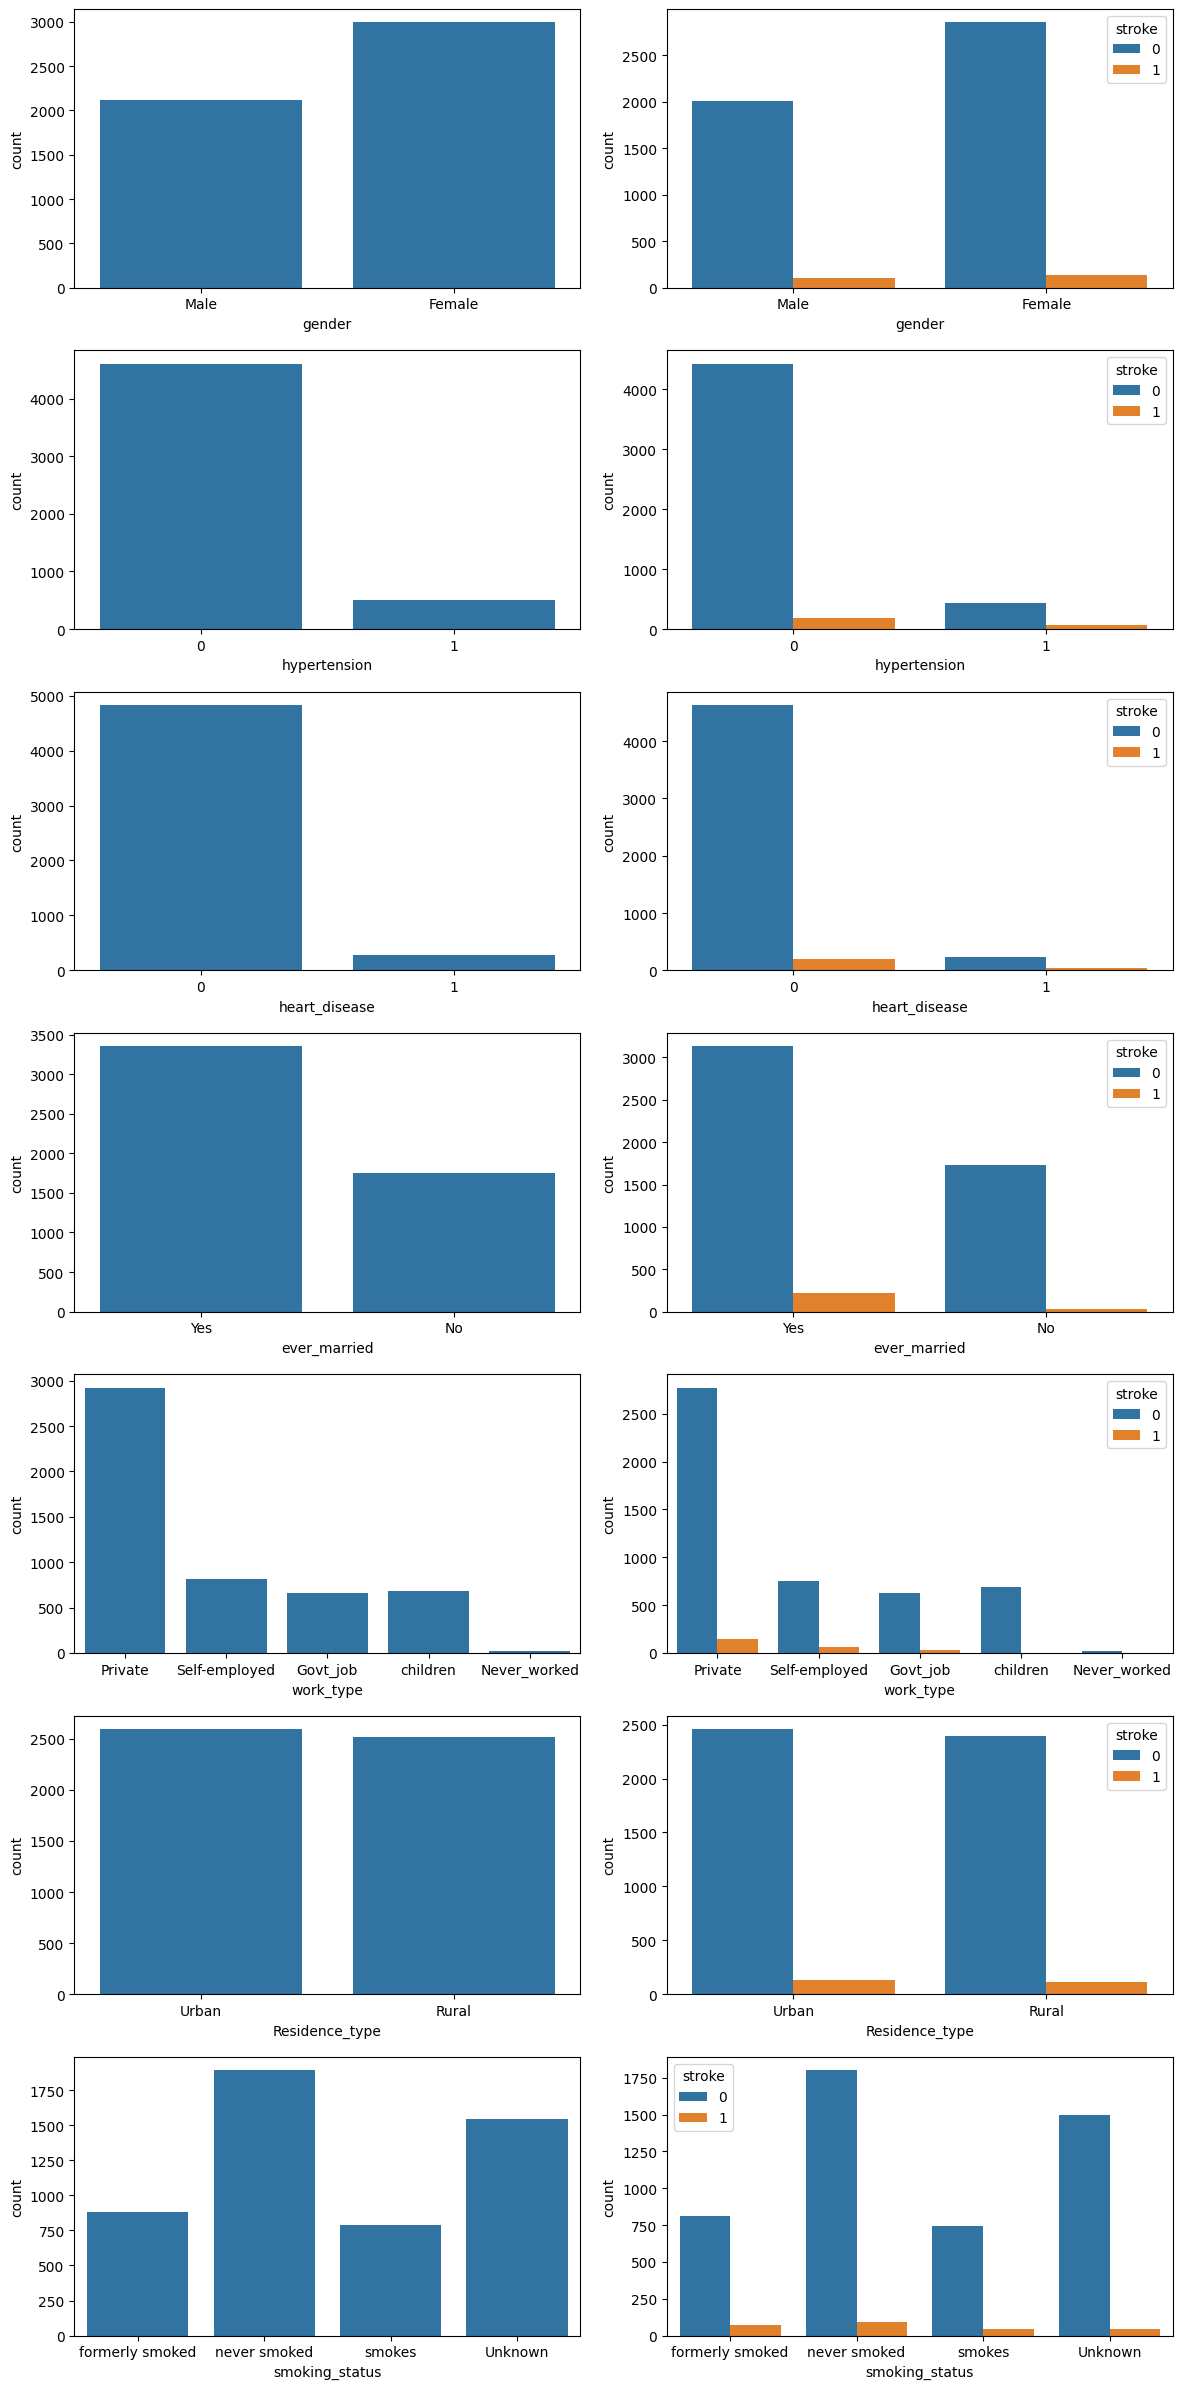

In [ ]:
# Category variables
fig,ax = plt.subplots(7, 2, figsize = (12, 24))
for index, i in enumerate(cat_cols):
    sns.countplot(data, x = i, ax = ax[index, 0])
    sns.countplot(data, x = i, ax = ax[index, 1], hue='stroke')
plt.tight_layout()
plt.show()

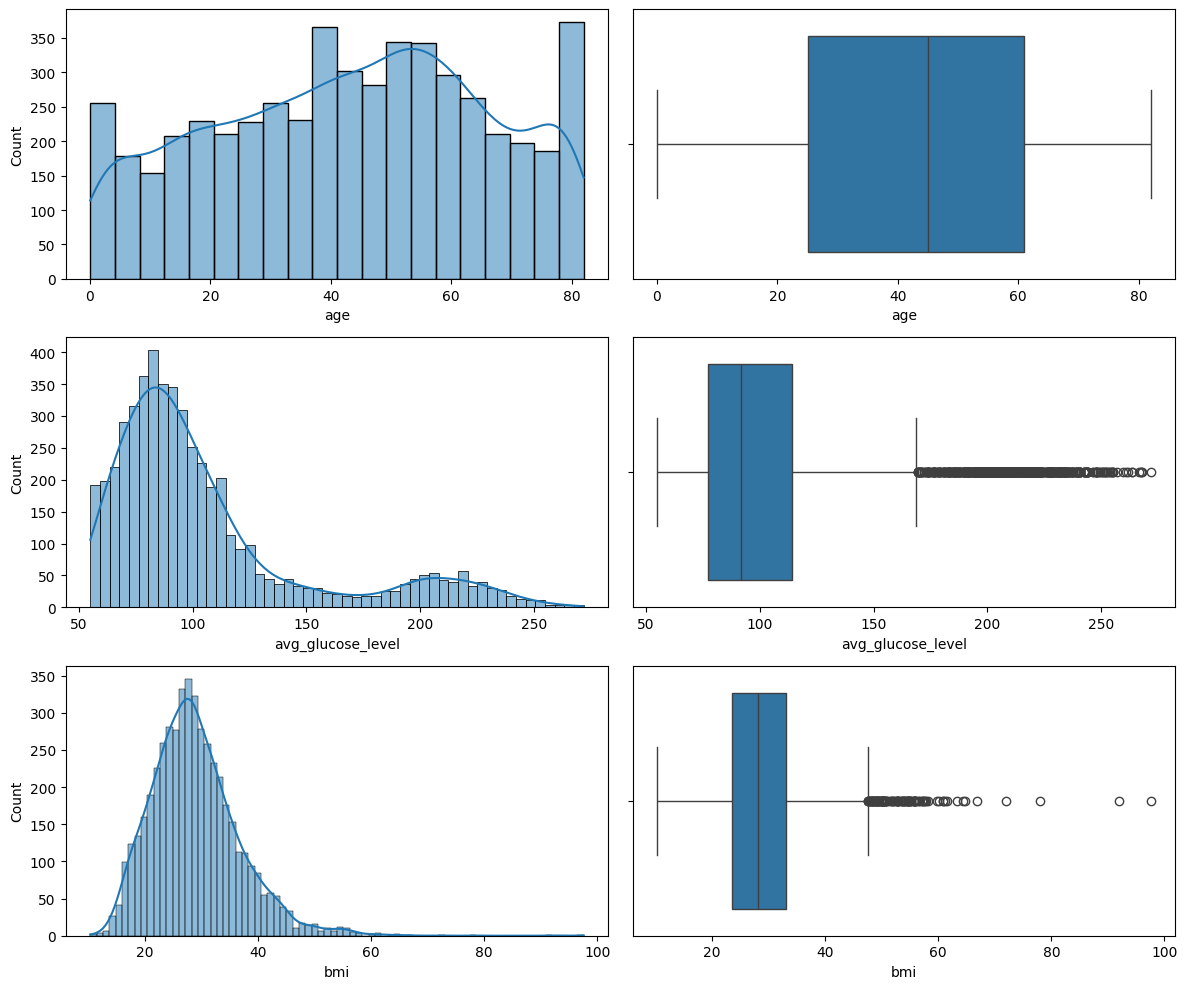

In [ ]:
# Continuous Variables
fig,ax=plt.subplots(3, 2, figsize=(12,10))
for index,i in enumerate(con_cols):
    sns.histplot(data[i], ax=ax[index,0], kde=True)
    sns.boxplot(data, x=i, ax=ax[index,1])
plt.tight_layout()
plt.show()

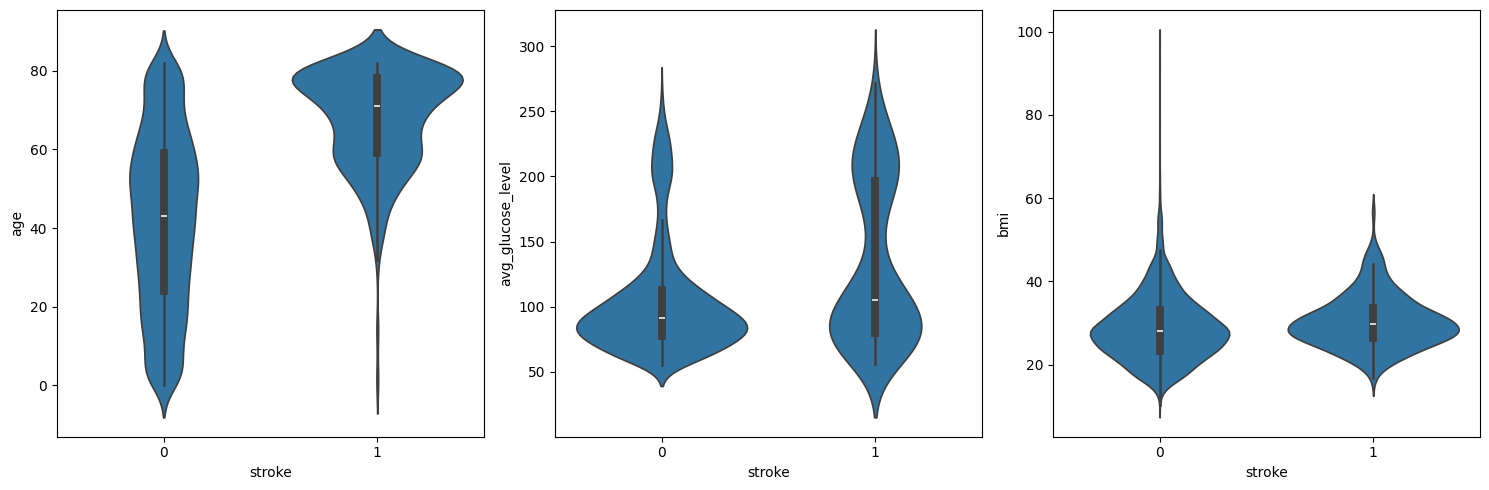

In [ ]:
# Violin plot
fig, axs = plt.subplots(1, 3, figsize=(15,5))
for var, subplot in zip(con_cols, axs.flatten()):
    sns.violinplot(x=data['stroke'], y=data[var], ax=subplot)
plt.tight_layout()
plt.show()

##Multiple variables data visualization

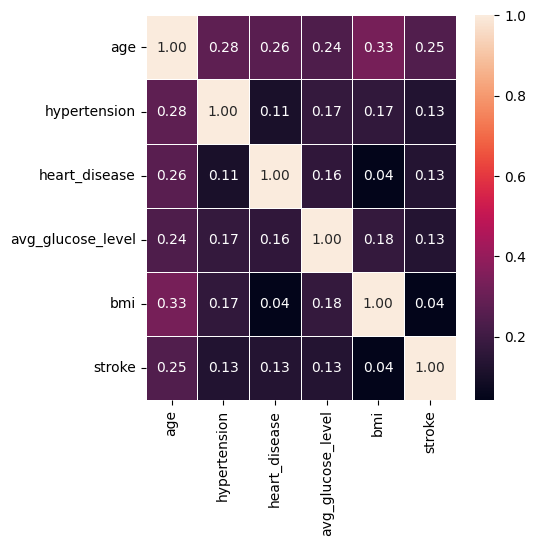

In [ ]:
# Correlation Matrix Heatmap
data_plot = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
plt.figure(figsize=(5,5))
sns.heatmap(data_plot.corr(), annot=True, linewidth=0.5, fmt='0.2f')
plt.show()

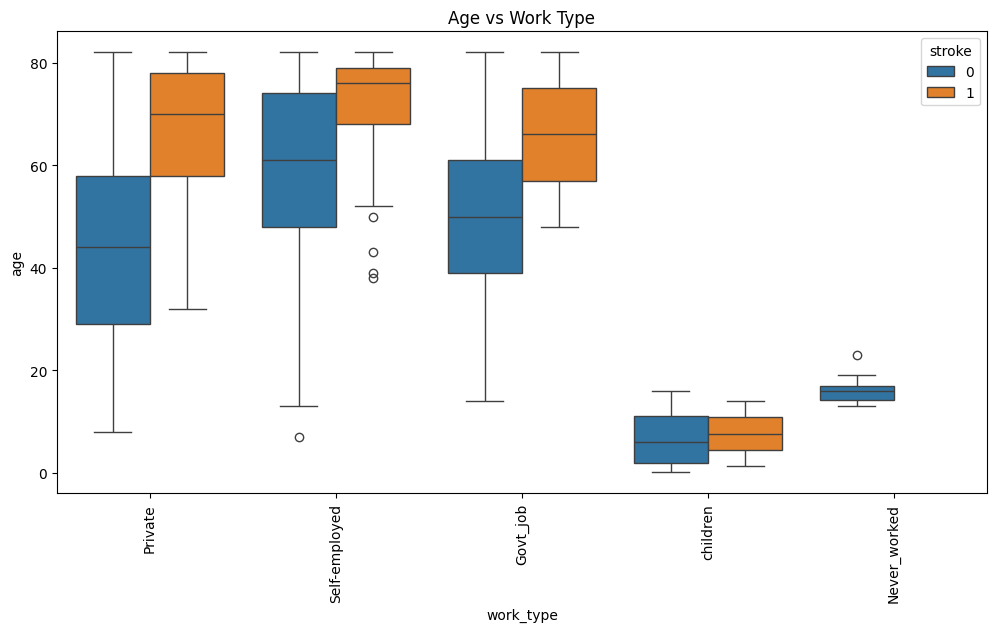

In [ ]:
# Boxplot of 'age' vs 'work_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['work_type'], y=data['age'], hue=data['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation=90)
plt.show()

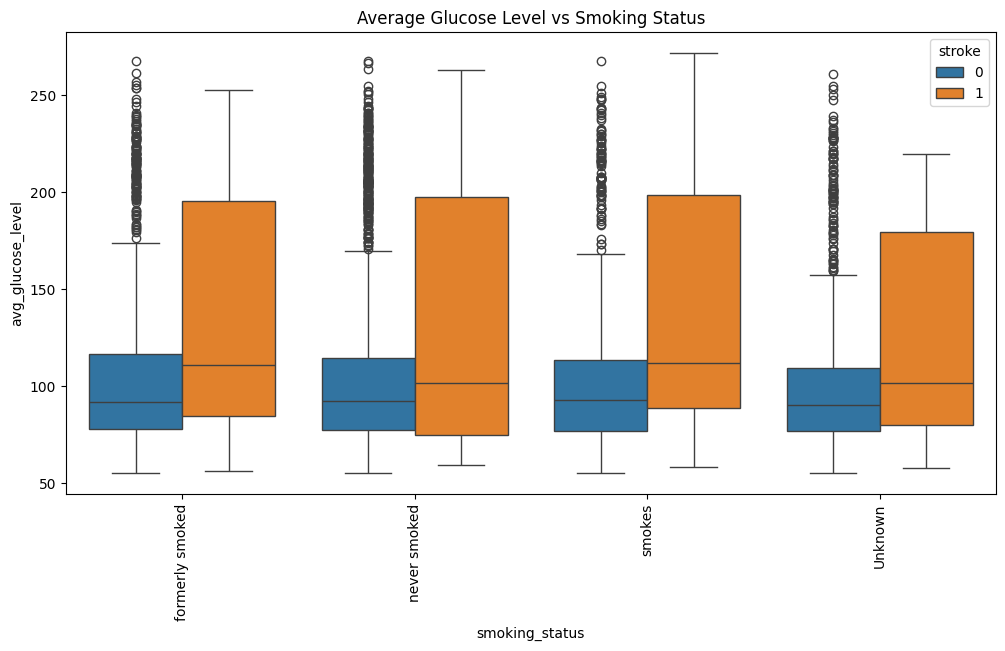

In [ ]:
# Boxplot of 'avg_glucose_level' vs 'smoking_status'
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['smoking_status'], y=data['avg_glucose_level'], hue=data['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation=90)
plt.show()

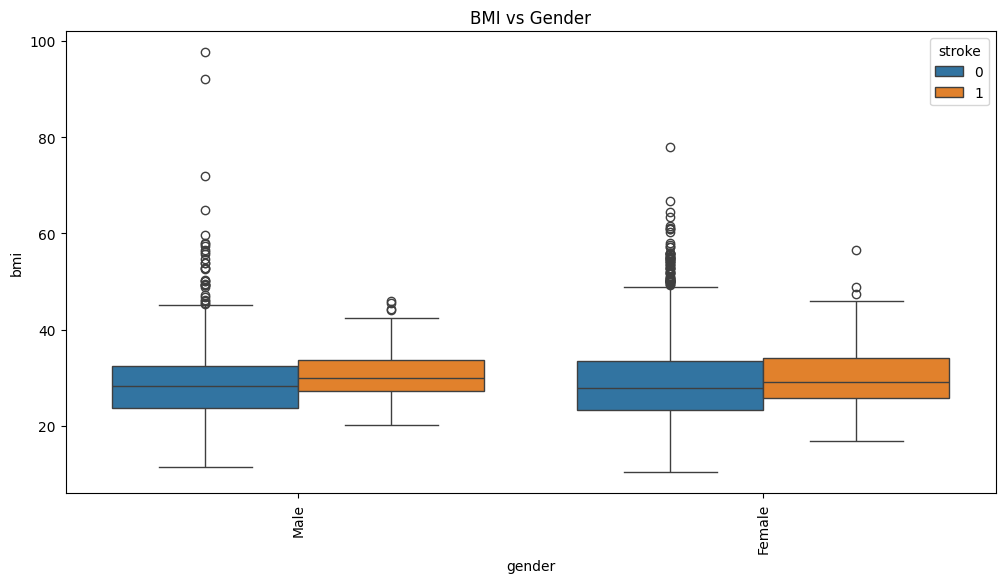

In [ ]:
# Boxplot of 'bmi' vs 'gender'
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['gender'], y=data['bmi'], hue=data['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation=90)
plt.show()

<ipython-input-521-8010014f413f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



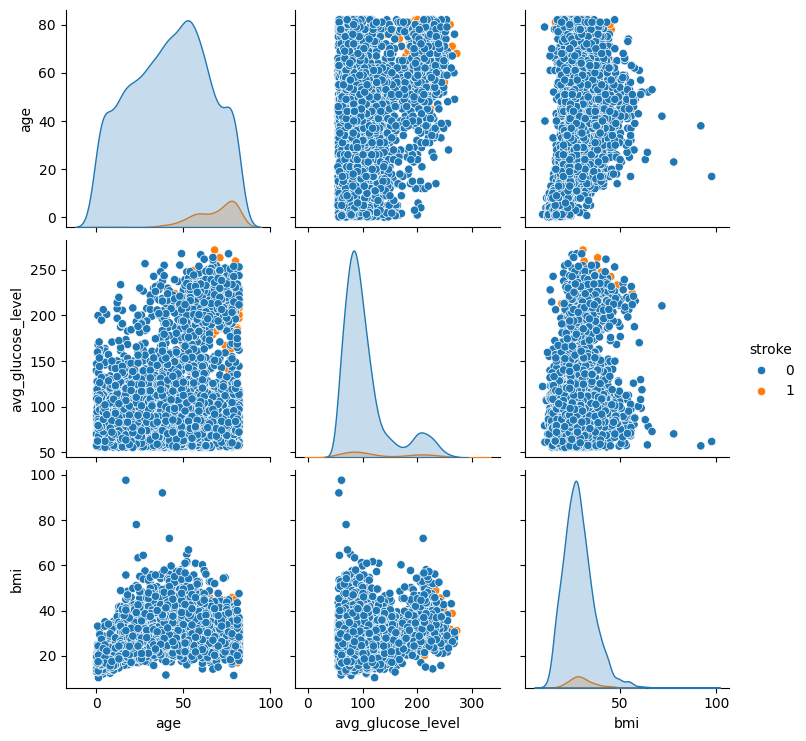

In [ ]:
# Subset the data for the pairplot
subset = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke')
plt.show()

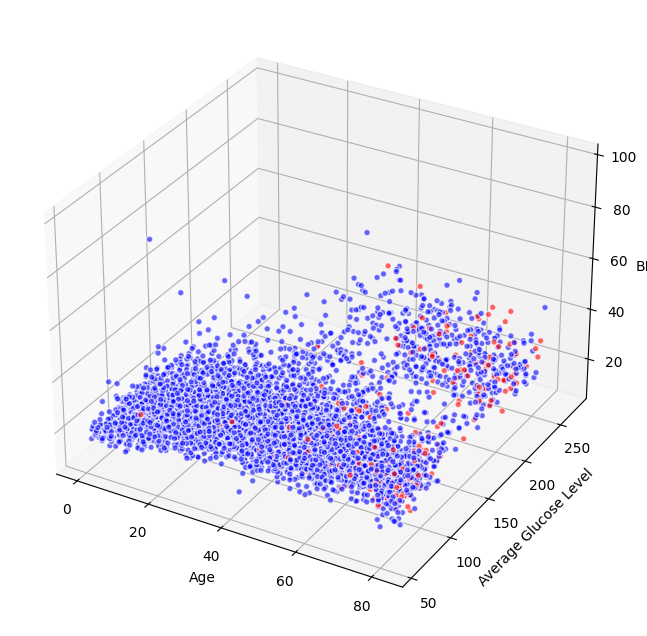

In [ ]:
# Visualize the interactions between age, avg_glucose_level, bmi, and stroke using a 3D scatter plot
colors = data['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(data['age'], data['avg_glucose_level'], data['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()

#Data cleaning

In [ ]:
# Check null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

0

In [ ]:
# Age categorize

def age_categorize(age):
    if age < 3.0:
        return 'Toddler'
    elif age >= 3.0 and age <= 12.0:
        return 'Children'
    elif age > 12 and age <= 18.0:
        return 'Teen'
    elif age > 18.0 and age <= 25.0:
        return 'Young Adult'
    elif age > 25.0 and age < 60.0:
        return 'Adult'
    else:
        return 'Senior'

data['age_group'] = data['age'].apply(age_categorize)

data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke age_group  
0       1    Senior  
1       1    Senior  
2       1    Senior  
3       1     Adult  
4       1    Senior

In [ ]:
fig = px.box(data, x = "age_group", y = "bmi", color = "gender")
fig.show()

In [ ]:
# Calculate mean BMI for age group & gender

mean_bmi = data.groupby(['age_group','gender'])['bmi'].mean().round(2)
mean_bmi

age_group    gender
Adult        Female    30.97
             Male      31.62
Children     Female    19.53
             Male      19.78
Senior       Female    29.90
             Male      30.06
Teen         Female    26.21
             Male      25.54
Toddler      Female    18.35
             Male      18.99
Young Adult  Female    27.99
             Male      27.22
Name: bmi, dtype: float64

In [ ]:
# Impute BMI for null entries

def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return mean_bmi.loc['Senior', 'Male']
            else:
                return mean_bmi.loc['Senior', 'Female']
        elif age_group == 'Adult':
            if gender == 'Male':
                return mean_bmi.loc['Adult', 'Male']
            else:
                return mean_bmi.loc['Adult', 'Female']
        elif age_group == 'Young Adult':
            if gender == 'Male':
                return mean_bmi.loc['Young Adult', 'Male']
            else:
                return mean_bmi.loc['Young Adult', 'Female']
        elif age_group == 'Teen':
            if gender == 'Male':
                return mean_bmi.loc['Teen', 'Male']
            else:
                return mean_bmi.loc['Teen', 'Female']
        elif age_group == 'Children':
            if gender == 'Male':
                return mean_bmi.loc['Children', 'Male']
            else:
                return mean_bmi.loc['Children', 'Female']
        else:
            if gender == 'Male':
                return mean_bmi.loc['Toddler', 'Male']
            else:
                return mean_bmi.loc['Toddler', 'Female']
    else:
        return bmi

data['bmi'] = data[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
data.head()

<ipython-input-528-041ee7b26dbc>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-528-041ee7b26dbc>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-528-041ee7b26dbc>:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  29.9     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke age_group  
0       1    Senior  
1       1    Senior  
2       1    Senior  
3       1     Adult  
4       1    Senior

#Data Preprocessing

In [ ]:
data_enc = pd.get_dummies(data[cat_cols], drop_first=True)
data_enc.head()

hypertension  heart_disease  gender_Male  ever_married_Yes  \
0             0              1         True              True   
1             0              0        False              True   
2             0              1         True              True   
3             0              0        False              True   
4             1              0        False              True   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0               False                  True                            True   
1               False                 False                           False   
2               False                 False                           False   
3               False                  True                           False   
4               False                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False

In [ ]:
data[data_enc.columns] = data_enc
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi  ... gender_Male  \
0        Private          Urban             228.69  36.6  ...        True   
1  Self-employed          Rural             202.21  29.9  ...       False   
2        Private          Rural             105.92  32.5  ...        True   
3        Private          Urban             171.23  34.4  ...       False   
4  Self-employed          Rural             174.12  24.0  ...       False   

   ever_married_Yes work_type_Never_worked  work_type_Private  \
0              True                  False               True   
1              True                  False              False   
2              True                  False               True   
3              True                  False               True   
4              True                  False              False   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                    False               False                  True   
1                     True               False                 False   
2                    False               False                 False   
3                    False               False                  True   
4                     True               False                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   
3                           False                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False  

[5 rows x 23 columns]

In [ ]:
data.drop(cat_cols, axis=1, inplace=True)
data.head()

id   age  avg_glucose_level   bmi  stroke age_group  gender_Male  \
0   9046  67.0             228.69  36.6       1    Senior         True   
1  51676  61.0             202.21  29.9       1    Senior        False   
2  31112  80.0             105.92  32.5       1    Senior         True   
3  60182  49.0             171.23  34.4       1     Adult        False   
4   1665  79.0             174.12  24.0       1    Senior        False   

   ever_married_Yes  work_type_Never_worked  work_type_Private  \
0              True                   False               True   
1              True                   False              False   
2              True                   False               True   
3              True                   False               True   
4              True                   False              False   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                    False               False                  True   
1                     True               False                 False   
2                    False               False                 False   
3                    False               False                  True   
4                     True               False                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   
3                           False                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False

In [ ]:
data_final = data.drop(['id','age_group'], axis=1)
data_final.head()

age  avg_glucose_level   bmi  stroke  gender_Male  ever_married_Yes  \
0  67.0             228.69  36.6       1         True              True   
1  61.0             202.21  29.9       1        False              True   
2  80.0             105.92  32.5       1         True              True   
3  49.0             171.23  34.4       1        False              True   
4  79.0             174.12  24.0       1        False              True   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0               False                  True                            True   
1               False                 False                           False   
2               False                 False                           False   
3               False                  True                           False   
4               False                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False

In [ ]:
X = data_final.drop(['stroke'], axis=1)
y = data_final['stroke']

# Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [ ]:
# Scaling of continuous columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_test[con_cols] = scaler.transform(X_test[con_cols])
X_train.head()

age  avg_glucose_level       bmi  gender_Male  ever_married_Yes  \
845   0.209397          -0.821221  0.539907        False              True   
3745 -0.629845          -0.485884 -0.993743        False             False   
4184 -0.364822           0.302317 -0.774650        False              True   
3410 -0.232310           0.062342  0.488356         True              True   
284  -1.292405          -0.527297  0.346590         True             False   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
845                    False               True                    False   
3745                   False               True                    False   
4184                   False               True                    False   
3410                   False               True                    False   
284                    False              False                    False   

      work_type_children  Residence_type_Urban  \
845                False                  True   
3745               False                  True   
4184               False                 False   
3410               False                 False   
284                False                  True   

      smoking_status_formerly smoked  smoking_status_never smoked  \
845                            False                         True   
3745                           False                         True   
4184                           False                         True   
3410                           False                         True   
284                            False                        False   

      smoking_status_smokes  
845                   False  
3745                  False  
4184                  False  
3410                  False  
284                   False

#Apply Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Calculate & Plot ROC curve

def plot_roc_curve(y_pred_proba, Y_test):
    # Calculate ROC curve and AUC

    # y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='mediumblue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

##KNN Classifier

In [ ]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn.fit(X_train, Y_train)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      1.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.99      1022
weighted avg       0.90      0.95      0.98      1022



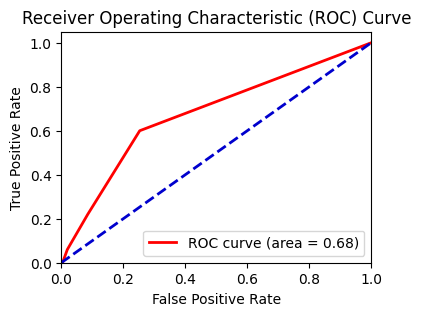

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

##Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200, 300],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_forest_classifier = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
random_forest_classifier.fit(X_train, Y_train)
y_pred = random_forest_classifier.predict(X_test)

print(classification_report(Y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022



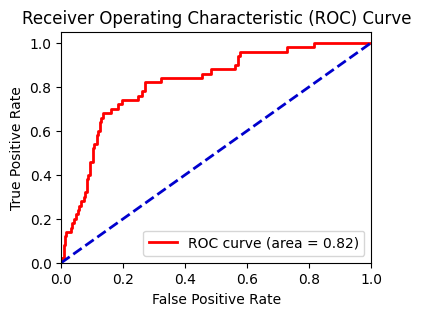

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

##Support Vector Classifier

In [ ]:
support_vector_classifier = SVC(random_state=42, probability=True)
support_vector_classifier.fit(X_train, Y_train)
y_pred = support_vector_classifier.predict(X_test)

print(classification_report(Y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022



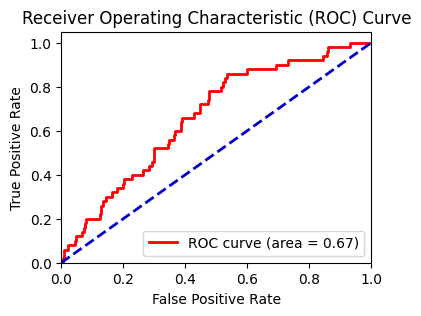

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

## 4 Layer CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
# Split the dataset into train, validation, and test sets
X_train_cnn, X_temp, Y_train_cnn, Y_temp = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_val_cnn, X_test_cnn, Y_val_cnn, Y_test_cnn = train_test_split(X_temp, Y_temp, test_size=0.5, stratify = Y_temp, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cnn)
X_val_scaled = scaler.transform(X_val_cnn)
X_test_scaled = scaler.transform(X_test_cnn)

In [ ]:
# Build the neural network model
model_4_layer = Sequential()
model_4_layer.add(Dense(60, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_4_layer.add(Dropout(0.2))
model_4_layer.add(Dense(30, activation='relu'))
model_4_layer.add(Dropout(0.4))
model_4_layer.add(Dense(30, activation='relu'))
model_4_layer.add(Dropout(0.4))
model_4_layer.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model
model_4_layer.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model_4_history = model_4_layer.fit(X_train_scaled, Y_train_cnn, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.2714 - val_accuracy: 0.9511 - val_loss: 0.1762
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9480 - loss: 0.1838 - val_accuracy: 0.9511 - val_loss: 0.1528
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9483 - loss: 0.1814 - val_accuracy: 0.9511 - val_loss: 0.1528
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.1575 - val_accuracy: 0.9511 - val_loss: 0.1594
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.1443 - val_accuracy: 0.9511 - val_loss: 0.1660
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1611 - val_accuracy: 0.9511 - val_loss: 0.1537
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1564 - val_accuracy: 0.9511 - val_loss: 0.1605
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.1632 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9464 - loss: 0.7818 
Test Loss: 0.6218
Test Accuracy: 0.9511


In [ ]:
def plot_training_history(title, model_history):
    training_loss = model_history.history['loss']
    validation_loss = model_history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, training_loss, 'b', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Make predictions on the test set
Y_pred = model_4_layer.predict(X_test_scaled)
Y_pred_classes = np.round(Y_pred)

# Display classification report and confusion matrix
print(classification_report(Y_test_cnn, Y_pred_classes, zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       1.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.98      0.50      0.49       511
weighted avg       0.95      0.95      0.93       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


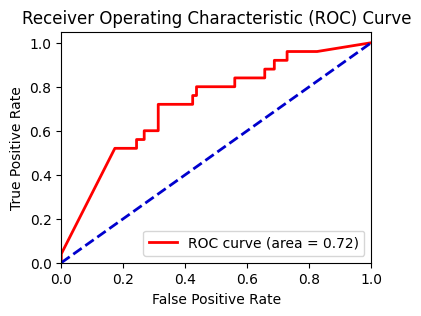

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

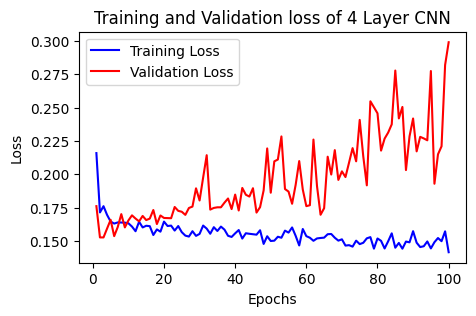

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN', model_4_history)

#Data Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

##Oversampling

### Naive random Oversampling

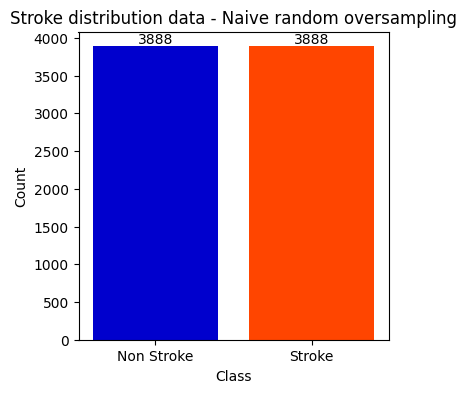

In [ ]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - Naive random oversampling", y_ros.value_counts())

### Synthetic Minority Oversampling Technique (SMOTE)

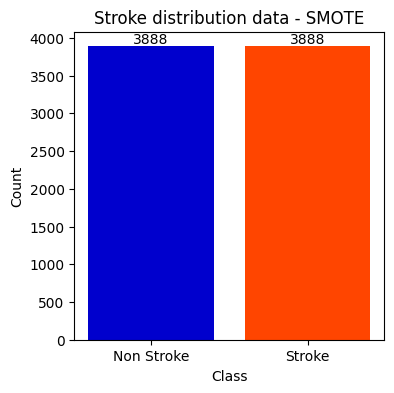

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - SMOTE", y_smote.value_counts())

### Adaptive Synthetic (ADASYN)

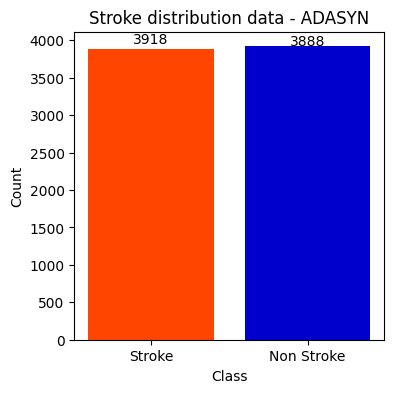

In [ ]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - ADASYN", y_adasyn.value_counts())

### BorderlineSMOTE

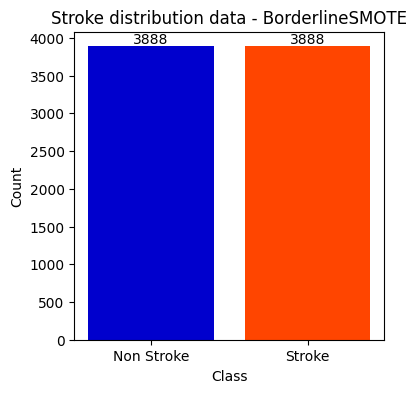

In [ ]:
X_borderline_smote, y_borderline_smote = BorderlineSMOTE().fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - BorderlineSMOTE", y_borderline_smote.value_counts())

### SVMSMOTE

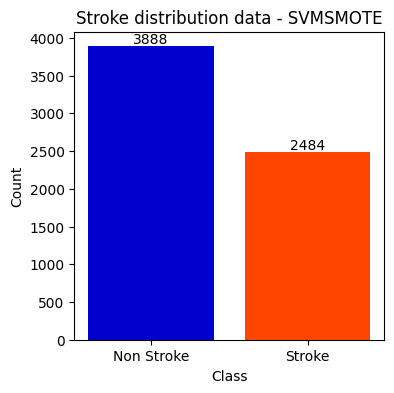

In [ ]:
X_svmsmote, y_svmsmote = SVMSMOTE().fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - SVMSMOTE", y_svmsmote.value_counts())

## Under-sampling

### Naive random Undersampling

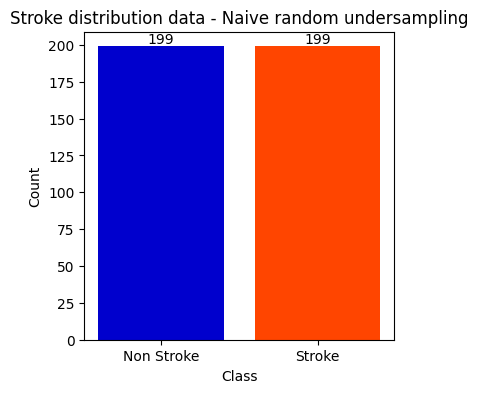

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - Naive random undersampling", y_rus.value_counts())

### Cluster Centroids Undersampling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



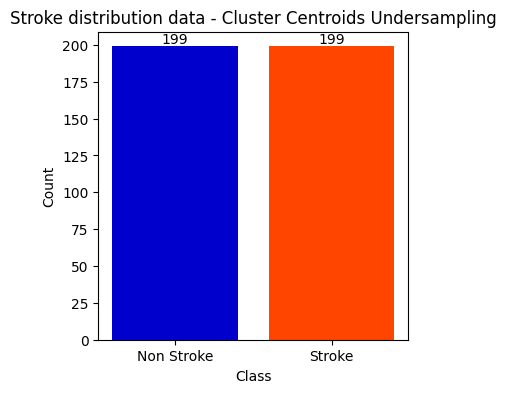

In [ ]:
cc = ClusterCentroids(random_state=0)
X_cluster_centroids, y_cluster_centroids = cc.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - Cluster Centroids Undersampling", y_cluster_centroids.value_counts())

### NearMiss

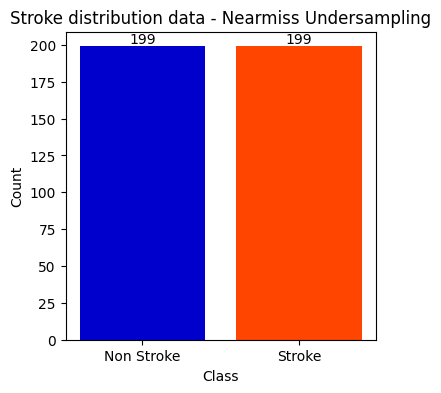

In [ ]:
nm1 = NearMiss(version=1)
X_near_miss, y_near_miss = nm1.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - Nearmiss Undersampling", y_near_miss.value_counts())

### EditedNearestNeighbours

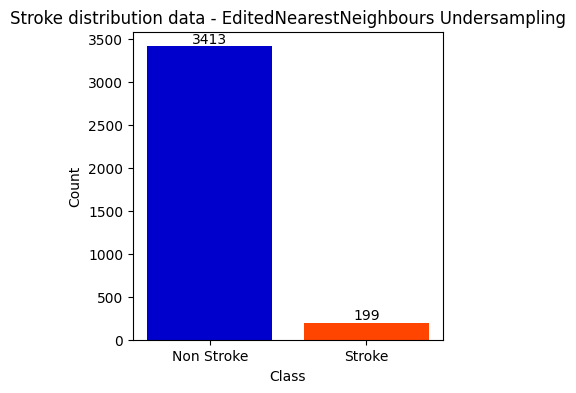

stroke
0    3413
1     199
Name: count, dtype: int64

In [ ]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - EditedNearestNeighbours Undersampling", y_enn.value_counts())
y_enn.value_counts()

## Combine Oversampling and Undersampling

### SMOTETomek

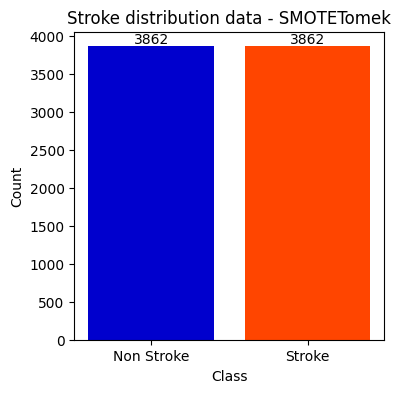

In [ ]:
smote_tomek = SMOTETomek(random_state=0)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - SMOTETomek", y_smote_tomek.value_counts())

### SMOTEENN

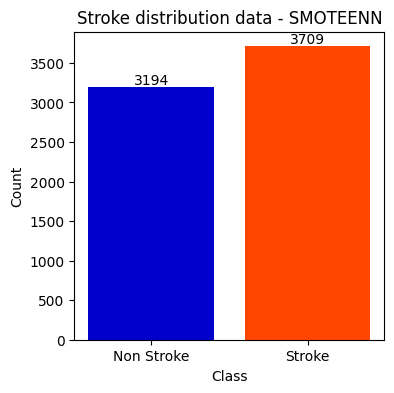

In [ ]:
smote_enn = SMOTEENN(random_state=0)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, Y_train)
plot_stroke_distribution("Stroke distribution data - SMOTEENN", y_smoteenn.value_counts(sort=False))

# Apply Model after Data Balancing

## KNN Classifier

### Naive random Oversampling

In [ ]:
knn.fit(X_ros, y_ros)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.07      0.06      0.07        50

    accuracy                           0.92      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.92      0.91      1022



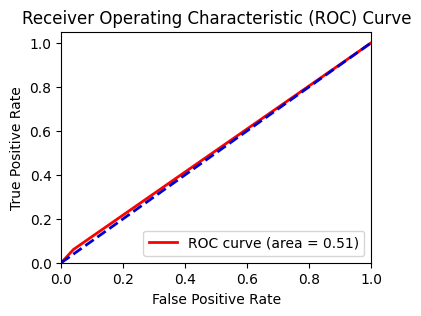

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### SMOTE

In [ ]:
knn.fit(X_smote, y_smote)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.10      0.24      0.14        50

    accuracy                           0.86      1022
   macro avg       0.53      0.56      0.53      1022
weighted avg       0.92      0.86      0.88      1022



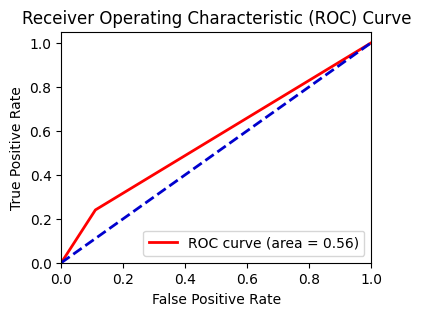

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### Adaptive Synthetic

In [ ]:
knn.fit(X_adasyn, y_adasyn)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.10      0.24      0.14        50

    accuracy                           0.86      1022
   macro avg       0.53      0.57      0.53      1022
weighted avg       0.92      0.86      0.89      1022



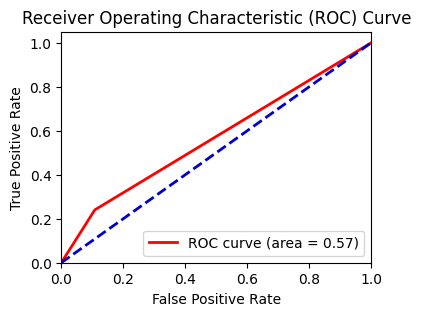

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### BorderlineSMOTE

In [ ]:
knn.fit(X_borderline_smote, y_borderline_smote)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.10      0.18      0.12        50

    accuracy                           0.88      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.88      0.89      1022



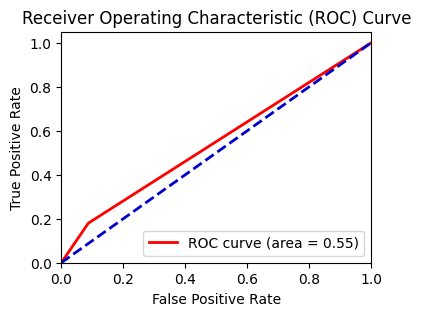

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### SVMSMOTE

In [ ]:
knn.fit(X_svmsmote, y_svmsmote)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.11      0.16      0.13        50

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.91      0.90      0.91      1022



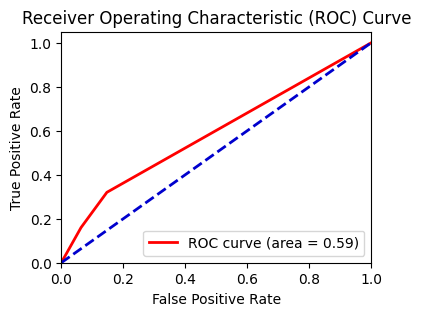

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### Naive random Undersampling

In [ ]:
knn.fit(X_rus, y_rus)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       972
           1       0.11      0.78      0.19        50

    accuracy                           0.68      1022
   macro avg       0.55      0.73      0.50      1022
weighted avg       0.94      0.68      0.77      1022



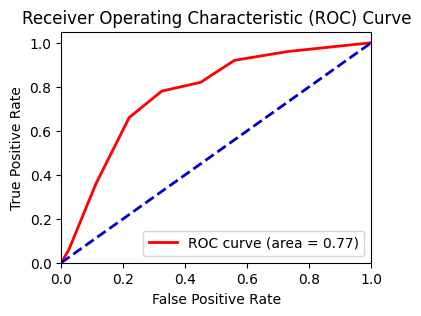

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### Cluster Centroids Undersampling

In [ ]:
knn.fit(X_cluster_centroids, y_cluster_centroids)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.13      0.22       972
           1       0.06      1.00      0.11        50

    accuracy                           0.17      1022
   macro avg       0.53      0.56      0.17      1022
weighted avg       0.95      0.17      0.22      1022



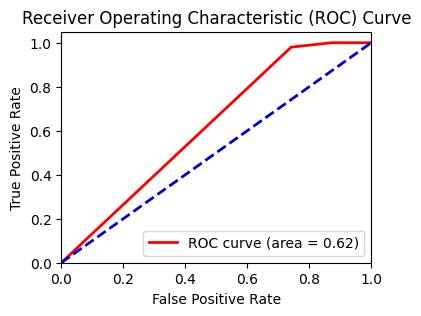

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### NearMiss

In [ ]:
knn.fit(X_near_miss, y_near_miss)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77       972
           1       0.06      0.48      0.11        50

    accuracy                           0.64      1022
   macro avg       0.51      0.56      0.44      1022
weighted avg       0.92      0.64      0.74      1022



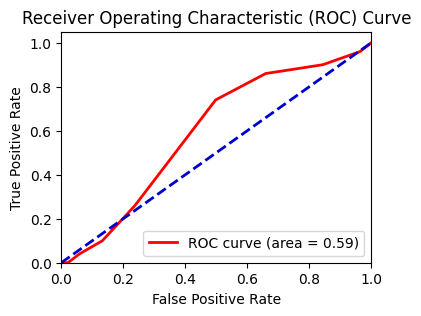

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### EditedNearestNeighbours

In [ ]:
knn.fit(X_enn, y_enn)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.12      0.24      0.16        50

    accuracy                           0.87      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.92      0.87      0.89      1022



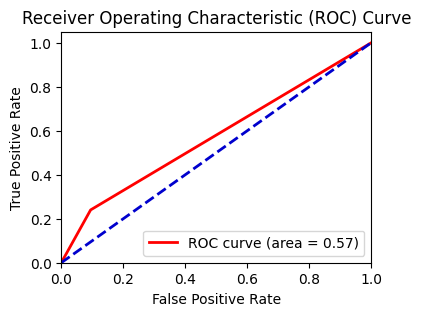

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### SMOTETomek

In [ ]:
knn.fit(X_smote_tomek, y_smote_tomek)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.11      0.24      0.15        50

    accuracy                           0.86      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.92      0.86      0.89      1022



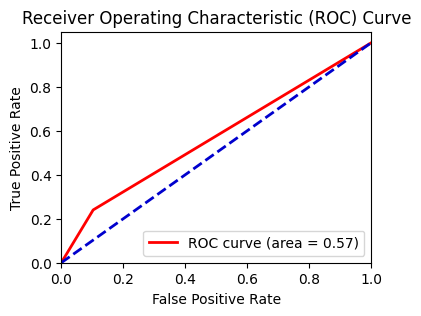

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

### SMOTEENN

In [ ]:
knn.fit(X_smoteenn, y_smoteenn)
print(classification_report(Y_test, knn.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.10      0.36      0.16        50

    accuracy                           0.81      1022
   macro avg       0.53      0.60      0.53      1022
weighted avg       0.92      0.81      0.86      1022



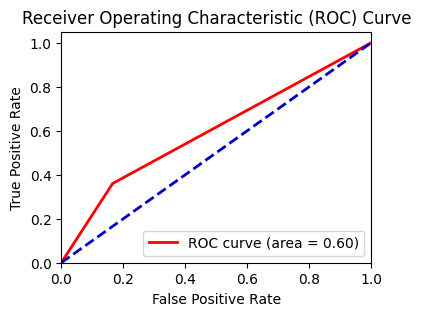

In [ ]:
plot_roc_curve(knn.predict_proba(X_test)[:, 1], Y_test)

## Random Forest Classifier

### Naive random Oversampling

In [ ]:
random_forest_classifier.fit(X_ros, y_ros)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.10      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



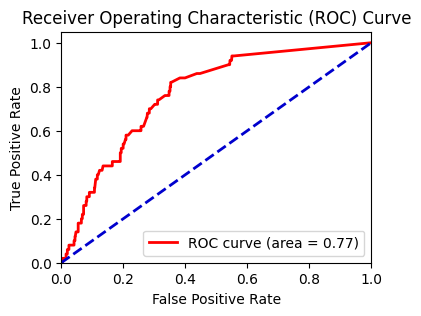

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTE

In [ ]:
random_forest_classifier.fit(X_smote, y_smote)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022



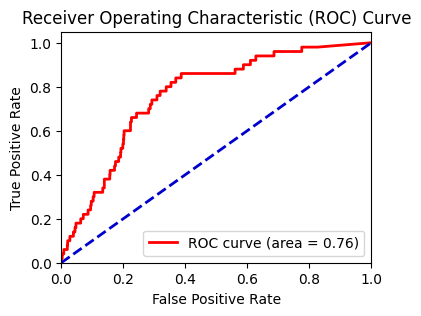

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### Adaptive Synthetic

In [ ]:
random_forest_classifier.fit(X_adasyn, y_adasyn)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.14      0.30      0.19        50

    accuracy                           0.88      1022
   macro avg       0.55      0.60      0.56      1022
weighted avg       0.92      0.88      0.90      1022



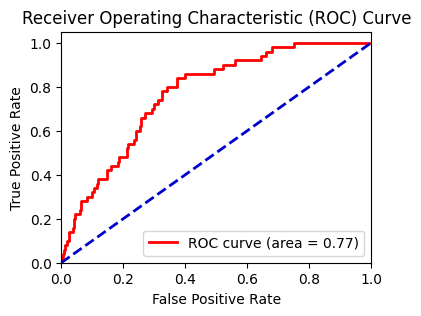

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### BorderlineSMOTE

In [ ]:
random_forest_classifier.fit(X_borderline_smote, y_borderline_smote)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.14      0.22      0.17        50

    accuracy                           0.90      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.90      0.91      1022



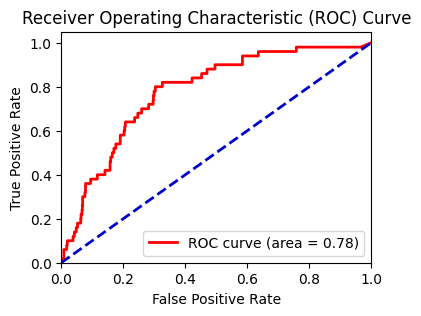

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### SVMSMOTE

In [ ]:
random_forest_classifier.fit(X_svmsmote, y_svmsmote)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       972
           1       0.18      0.62      0.28        50

    accuracy                           0.85      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.94      0.85      0.88      1022



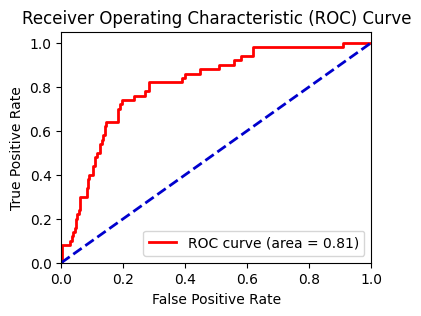

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### Naive random Undersampling

In [ ]:
random_forest_classifier.fit(X_rus, y_rus)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       972
           1       0.09      0.84      0.17        50

    accuracy                           0.60      1022
   macro avg       0.54      0.71      0.45      1022
weighted avg       0.94      0.60      0.71      1022



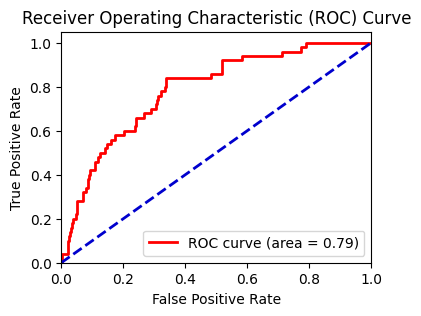

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### Cluster Centroids Undersampling

In [ ]:
random_forest_classifier.fit(X_cluster_centroids, y_cluster_centroids)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.52      0.50      0.05      1022
weighted avg       0.95      0.05      0.02      1022



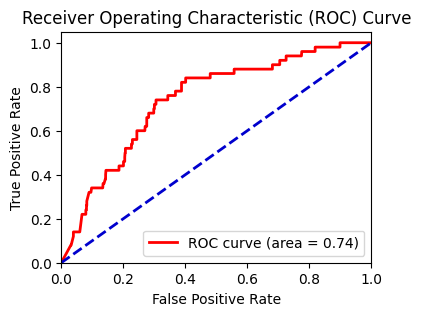

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### NearMiss

In [ ]:
random_forest_classifier.fit(X_near_miss, y_near_miss)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.23      0.37       972
           1       0.05      0.76      0.09        50

    accuracy                           0.25      1022
   macro avg       0.50      0.49      0.23      1022
weighted avg       0.90      0.25      0.35      1022



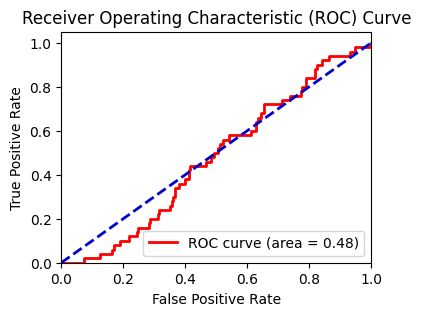

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### EditedNearestNeighbours

In [ ]:
random_forest_classifier.fit(X_enn, y_enn)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.22      0.08      0.12        50

    accuracy                           0.94      1022
   macro avg       0.59      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022



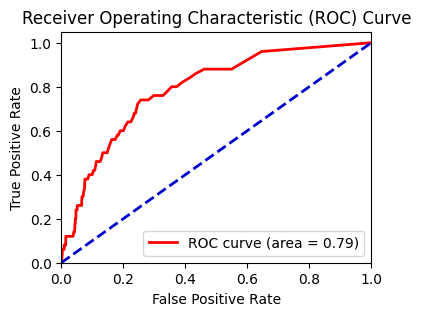

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTETomek

In [ ]:
random_forest_classifier.fit(X_smote_tomek, y_smote_tomek)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.75      1022
   macro avg       0.55      0.71      0.53      1022
weighted avg       0.94      0.75      0.82      1022



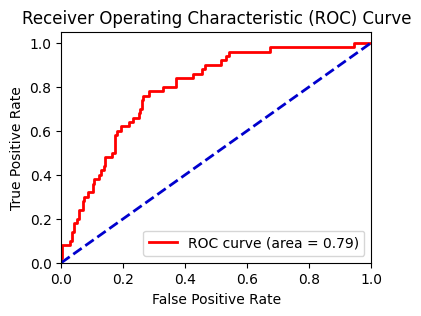

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTEENN

In [ ]:
random_forest_classifier.fit(X_smoteenn, y_smoteenn)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.13      0.42      0.20        50

    accuracy                           0.84      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.93      0.84      0.87      1022



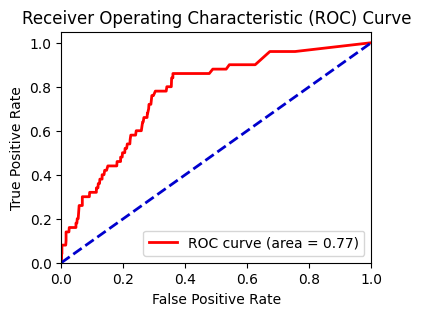

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

## Support Vector Classifier

### Naive random Oversampling

In [ ]:
support_vector_classifier.fit(X_ros, y_ros)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.11      0.66      0.19        50

    accuracy                           0.73      1022
   macro avg       0.54      0.69      0.51      1022
weighted avg       0.93      0.73      0.80      1022



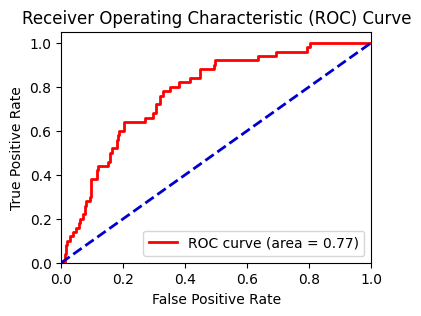

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTE

In [ ]:
support_vector_classifier.fit(X_smote, y_smote)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       972
           1       0.12      0.60      0.20        50

    accuracy                           0.77      1022
   macro avg       0.55      0.69      0.53      1022
weighted avg       0.93      0.77      0.83      1022



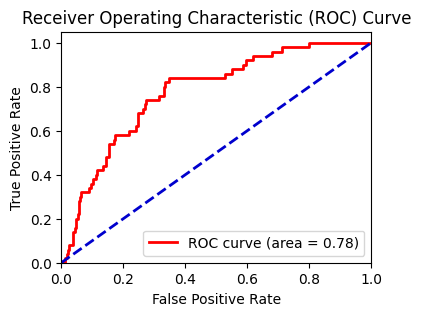

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### Adaptive Synthetic

In [ ]:
support_vector_classifier.fit(X_adasyn, y_adasyn)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       972
           1       0.12      0.60      0.20        50

    accuracy                           0.77      1022
   macro avg       0.55      0.69      0.53      1022
weighted avg       0.93      0.77      0.83      1022



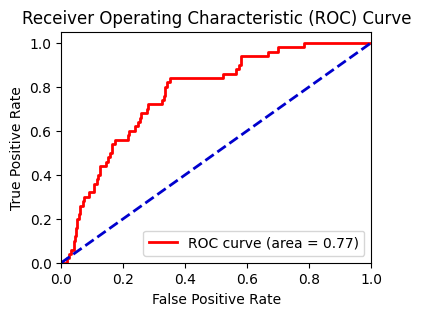

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### BorderlineSMOTE

In [ ]:
support_vector_classifier.fit(X_borderline_smote, y_borderline_smote)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.15      0.62      0.24        50

    accuracy                           0.81      1022
   macro avg       0.56      0.72      0.56      1022
weighted avg       0.94      0.81      0.86      1022



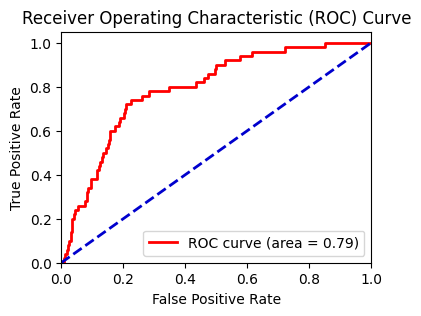

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### SVMSMOTE

In [ ]:
support_vector_classifier.fit(X_svmsmote, y_svmsmote)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.16      0.52      0.24        50

    accuracy                           0.84      1022
   macro avg       0.56      0.69      0.58      1022
weighted avg       0.93      0.84      0.88      1022



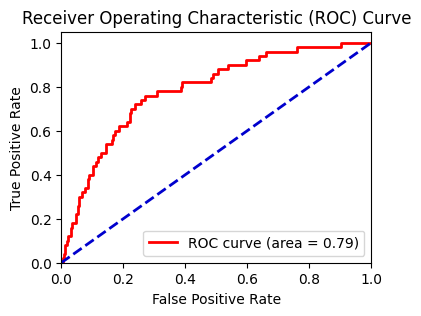

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### Naive random Undersampling

In [ ]:
support_vector_classifier.fit(X_rus, y_rus)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.11      0.82      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.74      0.50      1022
weighted avg       0.94      0.68      0.77      1022



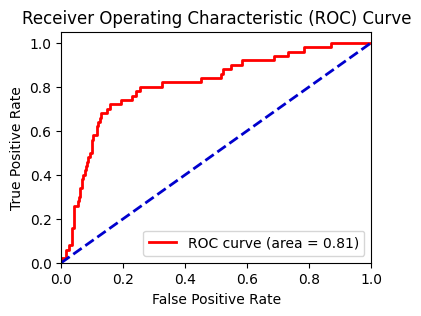

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### Cluster Centroids Undersampling

In [ ]:
support_vector_classifier.fit(X_cluster_centroids, y_cluster_centroids)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       972
           1       0.05      1.00      0.09        50

    accuracy                           0.06      1022
   macro avg       0.52      0.51      0.06      1022
weighted avg       0.95      0.06      0.03      1022



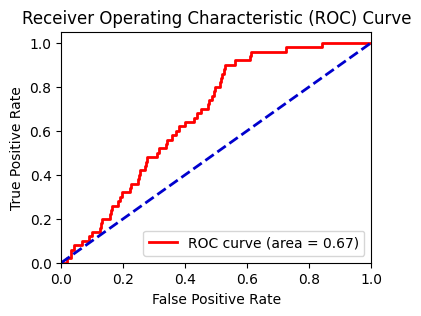

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### NearMiss

In [ ]:
support_vector_classifier.fit(X_near_miss, y_near_miss)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      0.24      0.38       972
           1       0.05      0.76      0.09        50

    accuracy                           0.27      1022
   macro avg       0.50      0.50      0.24      1022
weighted avg       0.91      0.27      0.37      1022



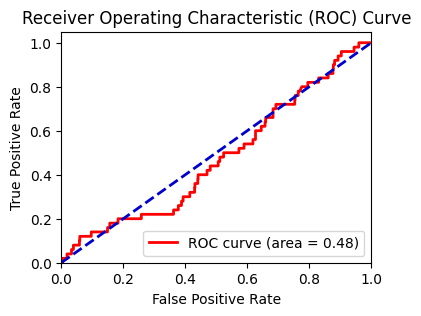

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### EditedNearestNeighbours

In [ ]:
support_vector_classifier.fit(X_enn, y_enn)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       1.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.98      0.50      0.49      1022
weighted avg       0.95      0.95      0.93      1022



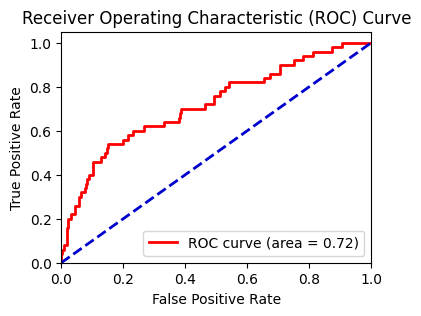

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTETomek

In [ ]:
support_vector_classifier.fit(X_smote_tomek, y_smote_tomek)
print(classification_report(Y_test, support_vector_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.58      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.93      0.78      0.84      1022



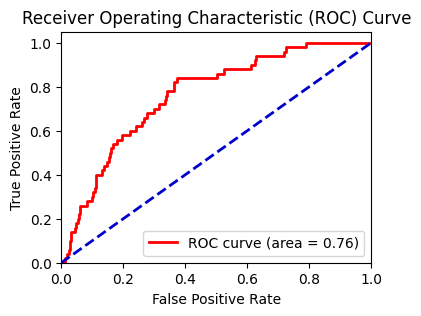

In [ ]:
plot_roc_curve(support_vector_classifier.predict_proba(X_test)[:, 1], Y_test)

### SMOTEENN

In [ ]:
random_forest_classifier.fit(X_smoteenn, y_smoteenn)
print(classification_report(Y_test, random_forest_classifier.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       972
           1       0.13      0.44      0.21        50

    accuracy                           0.83      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.93      0.83      0.87      1022



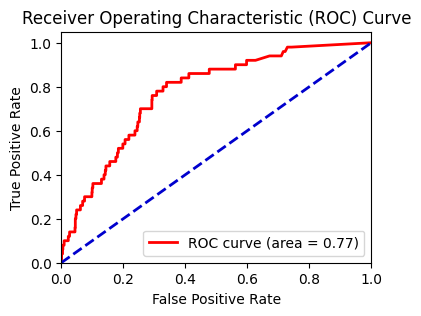

In [ ]:
plot_roc_curve(random_forest_classifier.predict_proba(X_test)[:, 1], Y_test)

## 4 Layer CNN

In [ ]:
# Naive random oversampling
X_ros_scaled = scaler.fit_transform(X_ros)

# SMOTE
X_smote_scaled = scaler.fit_transform(X_smote)

# ADASYN
X_adasyn_scaled = scaler.fit_transform(X_adasyn)

# Borderline SMOTE
X_borderline_smote_scaled = scaler.fit_transform(X_smote)

# SVMSMOTE
X_svmsmote_scaled = scaler.fit_transform(X_svmsmote)

# Naive random undersampling
X_rus_scaled = scaler.fit_transform(X_rus)

# Cluster centroids
X_cluster_centroids_scaled = scaler.fit_transform(X_cluster_centroids)

# Near miss
X_near_miss_scaled = scaler.fit_transform(X_near_miss)

# Edited Nearest Neighbours
X_enn_scaled = scaler.fit_transform(X_enn)

# SMOTETomek
X_smote_tomek_scaled = scaler.fit_transform(X_smote_tomek)

# SMOTEENN
X_smoteenn_scaled = scaler.fit_transform(X_smoteenn)

### Naive random Oversampling

In [ ]:
model_4_ros_history = model_4_layer.fit(X_ros_scaled, y_ros, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - loss: 0.7919 - val_accuracy: 0.5479 - val_loss: 0.6254
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.4038 - val_accuracy: 0.5695 - val_loss: 0.6755
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3632 - val_accuracy: 0.5910 - val_loss: 0.6208
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3758 - val_accuracy: 0.5714 - val_loss: 0.6782
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3429 - val_accuracy: 0.6223 - val_loss: 0.6449
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3504 - val_accuracy: 0.6047 - val_loss: 0.6711
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3364 - val_accuracy: 0.5949 - val_loss: 0.7086
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3345 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6781 - loss: 1.9451 
Test Loss: 1.7810
Test Accuracy: 0.6634


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       486
           1       0.09      0.64      0.16        25

    accuracy                           0.66       511
   macro avg       0.53      0.65      0.47       511
weighted avg       0.93      0.66      0.76       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


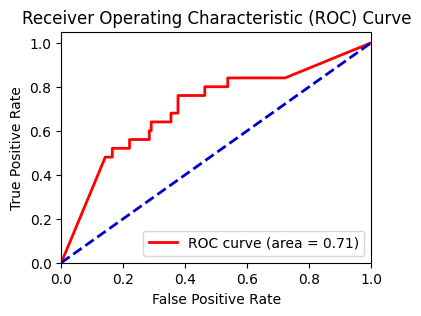

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

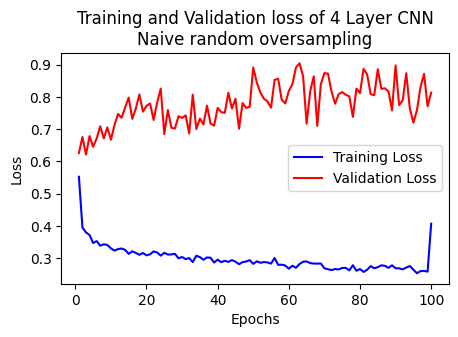

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nNaive random oversampling', model_4_ros_history)

### SMOTE

In [ ]:
model_4_smote_history = model_4_layer.fit(X_smote_scaled, y_smote, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.8803 - val_accuracy: 0.5910 - val_loss: 0.6423
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.4299 - val_accuracy: 0.6145 - val_loss: 0.6343
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.3985 - val_accuracy: 0.5988 - val_loss: 0.6370
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3928 - val_accuracy: 0.6106 - val_loss: 0.6412
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3760 - val_accuracy: 0.6184 - val_loss: 0.6286
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.3599 - val_accuracy: 0.6204 - val_loss: 0.6939
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.3575 - val_accuracy: 0.6517 - val_loss: 0.6749
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3538 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6365 - loss: 1.2105 
Test Loss: 1.0734
Test Accuracy: 0.6517


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.97      0.66      0.78       486
           1       0.08      0.56      0.14        25

    accuracy                           0.65       511
   macro avg       0.52      0.61      0.46       511
weighted avg       0.92      0.65      0.75       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


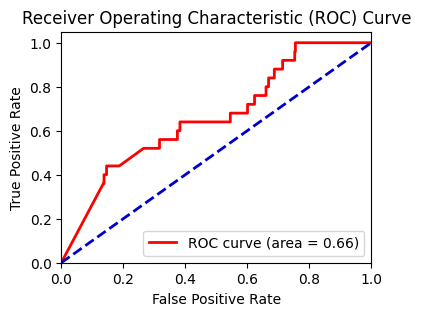

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

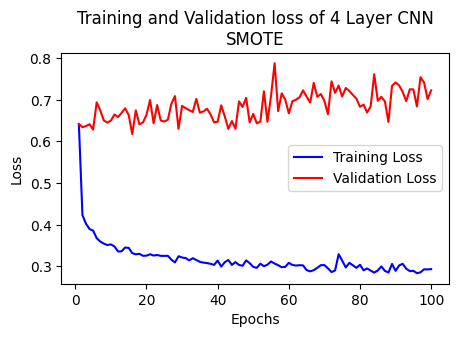

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nSMOTE', model_4_smote_history)

### Adaptive Synthetic

In [ ]:
model_4_adasyn_history = model_4_layer.fit(X_adasyn_scaled, y_adasyn, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - loss: 0.3175 - val_accuracy: 0.6986 - val_loss: 0.7016
Epoch 2/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.3178 - val_accuracy: 0.6223 - val_loss: 0.7491
Epoch 3/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8845 - loss: 0.3030 - val_accuracy: 0.6888 - val_loss: 0.7431
Epoch 4/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3270 - val_accuracy: 0.6321 - val_loss: 0.8223
Epoch 5/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8780 - loss: 0.3198 - val_accuracy: 0.6575 - val_loss: 0.7497
Epoch 6/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3076 - val_accuracy: 0.6262 - val_loss: 0.7610
Epoch 7/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.2953 - val_accuracy: 0.6712 - val_loss: 0.7468
Epoch 8/100
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.3036 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - loss: 1.3546 
Test Loss: 1.2264
Test Accuracy: 0.6869


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       486
           1       0.08      0.52      0.14        25

    accuracy                           0.69       511
   macro avg       0.52      0.61      0.47       511
weighted avg       0.92      0.69      0.78       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


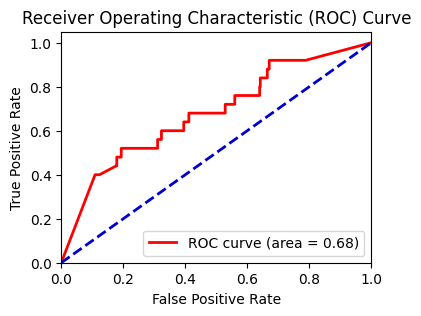

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

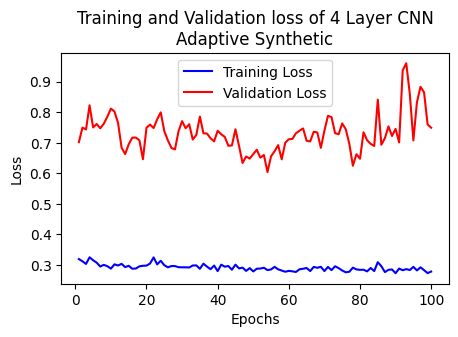

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nAdaptive Synthetic', model_4_adasyn_history)

### BorderlineSMOTE

In [ ]:
model_4_borderline_smote_history = model_4_layer.fit(X_borderline_smote_scaled, y_borderline_smote, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.3055 - val_accuracy: 0.6967 - val_loss: 0.8424
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.3028 - val_accuracy: 0.7143 - val_loss: 0.7219
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8922 - loss: 0.2901 - val_accuracy: 0.7162 - val_loss: 0.7743
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.3015 - val_accuracy: 0.7123 - val_loss: 0.7384
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8951 - loss: 0.2762 - val_accuracy: 0.6849 - val_loss: 0.7543
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8954 - loss: 0.2802 - val_accuracy: 0.7162 - val_loss: 0.7071
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.2929 - val_accuracy: 0.6967 - val_loss: 0.7463
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8904 - loss: 0.2849 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6523 - loss: 1.0734 
Test Loss: 1.2752
Test Accuracy: 0.6654


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.96      0.67      0.79       486
           1       0.08      0.52      0.13        25

    accuracy                           0.67       511
   macro avg       0.52      0.60      0.46       511
weighted avg       0.92      0.67      0.76       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


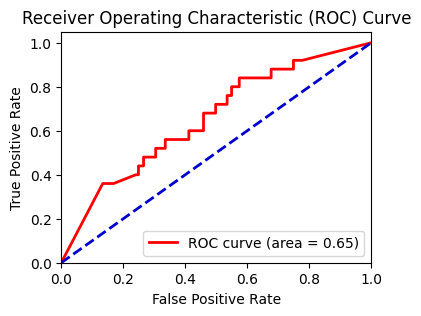

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

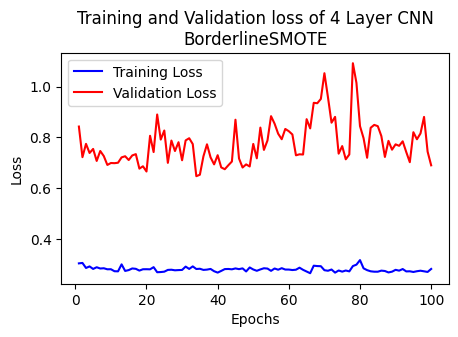

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nBorderlineSMOTE', model_4_borderline_smote_history)

### SVMSMOTE

In [ ]:
model_4_svmsmote_history = model_4_layer.fit(X_svmsmote_scaled, y_svmsmote, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.2914 - val_accuracy: 0.7867 - val_loss: 0.6449
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.2773 - val_accuracy: 0.7750 - val_loss: 0.7081
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.2588 - val_accuracy: 0.7515 - val_loss: 0.6716
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8900 - loss: 0.2628 - val_accuracy: 0.7828 - val_loss: 0.6462
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.2794 - val_accuracy: 0.7691 - val_loss: 0.6716
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.2512 - val_accuracy: 0.7886 - val_loss: 0.6366
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2514 - val_accuracy: 0.7886 - val_loss: 0.6617
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.2742 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 1.5453 
Test Loss: 1.5909
Test Accuracy: 0.7613


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       486
           1       0.10      0.48      0.16        25

    accuracy                           0.76       511
   macro avg       0.53      0.63      0.51       511
weighted avg       0.92      0.76      0.83       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


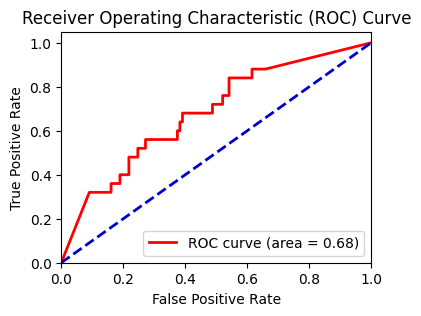

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

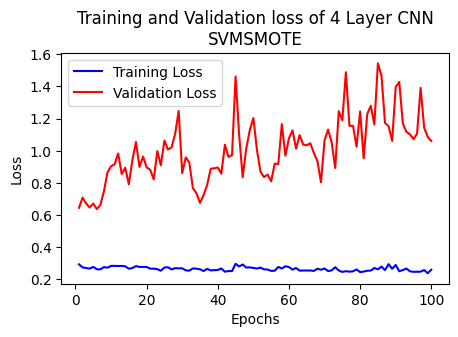

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nSVMSMOTE', model_4_svmsmote_history)

### Naive random Undersampling

In [ ]:
model_4_rus_history = model_4_layer.fit(X_rus_scaled, y_rus, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8364 - loss: 0.6231 - val_accuracy: 0.6967 - val_loss: 0.8672
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8186 - loss: 0.4299 - val_accuracy: 0.7104 - val_loss: 0.9632
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8706 - loss: 0.4009 - val_accuracy: 0.7221 - val_loss: 1.2591
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8893 - loss: 0.2914 - val_accuracy: 0.7025 - val_loss: 1.2787
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8757 - loss: 0.3060 - val_accuracy: 0.6986 - val_loss: 1.2769
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8871 - loss: 0.4782 - val_accuracy: 0.7025 - val_loss: 1.3186
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8609 - loss: 0.3814 - val_accuracy: 0.7006 - val_loss: 1.2731
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8958 - loss: 0.2834 - val_accuracy: 0.6

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 2.2064 
Test Loss: 2.5555
Test Accuracy: 0.6693


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.97      0.67      0.80       486
           1       0.08      0.56      0.14        25

    accuracy                           0.67       511
   macro avg       0.52      0.62      0.47       511
weighted avg       0.92      0.67      0.76       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


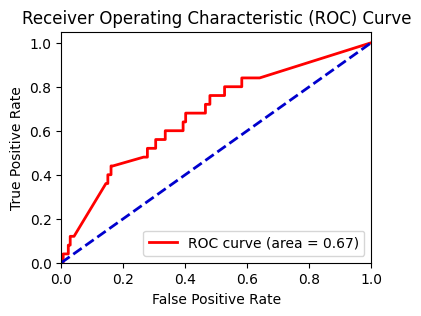

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

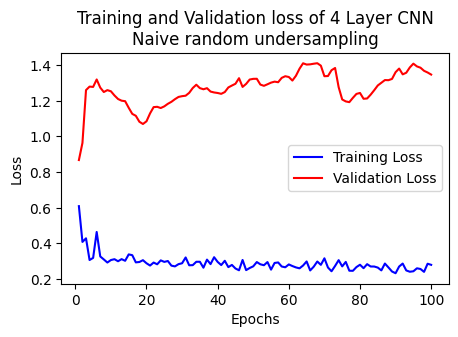

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nNaive random undersampling', model_4_rus_history)

### Cluster Centroids Undersampling

In [ ]:
model_4_cluster_centroids_history = model_4_layer.fit(X_cluster_centroids_scaled, y_cluster_centroids, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9289 - loss: 0.8063 - val_accuracy: 0.6830 - val_loss: 1.1425
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9489 - loss: 0.8048 - val_accuracy: 0.6810 - val_loss: 1.3342
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9497 - loss: 0.1756 - val_accuracy: 0.6928 - val_loss: 1.5186
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9281 - loss: 0.2051 - val_accuracy: 0.7123 - val_loss: 1.5568
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9674 - loss: 0.1347 - val_accuracy: 0.7143 - val_loss: 1.6291
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9759 - loss: 0.1081 - val_accuracy: 0.7417 - val_loss: 1.6526
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9682 - loss: 0.1069 - val_accuracy: 0.7476 - val_loss: 1.7026
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9839 - loss: 0.0898 - val_accuracy: 0.7593 - v

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 5.1342  
Test Loss: 4.8016
Test Accuracy: 0.7730


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       486
           1       0.10      0.44      0.16        25

    accuracy                           0.77       511
   macro avg       0.53      0.62      0.51       511
weighted avg       0.92      0.77      0.83       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


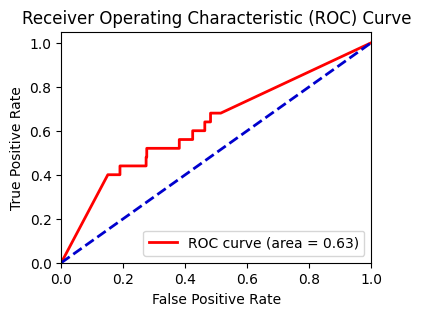

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

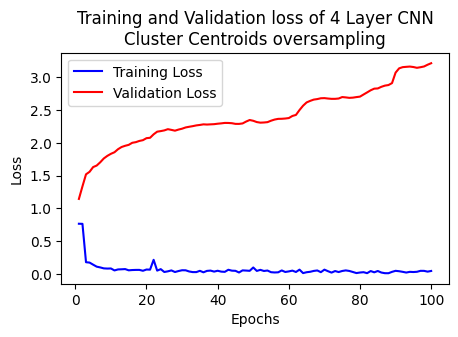

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nCluster Centroids oversampling', model_4_cluster_centroids_history)

### NearMiss

In [ ]:
model_4_near_miss_history = model_4_layer.fit(X_near_miss_scaled, y_near_miss, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5049 - loss: 80.5765 - val_accuracy: 0.0489 - val_loss: 4.4177
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5147 - loss: 2.1831 - val_accuracy: 0.0489 - val_loss: 2.9020
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4922 - loss: 1.4815 - val_accuracy: 0.0489 - val_loss: 2.2268
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5138 - loss: 1.1175 - val_accuracy: 0.0568 - val_loss: 1.7060
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5448 - loss: 0.8791 - val_accuracy: 0.0802 - val_loss: 1.3483
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5139 - loss: 0.8446 - val_accuracy: 0.0861 - val_loss: 1.1426
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5237 - loss: 1.1512 - val_accuracy: 0.0489 - val_loss: 1.1308
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4793 - loss: 0.8127 - val_accuracy: 0.0489 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7622 - loss: 0.9088 
Test Loss: 0.8654
Test Accuracy: 0.7828


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       486
           1       0.10      0.44      0.17        25

    accuracy                           0.78       511
   macro avg       0.53      0.62      0.52       511
weighted avg       0.92      0.78      0.84       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


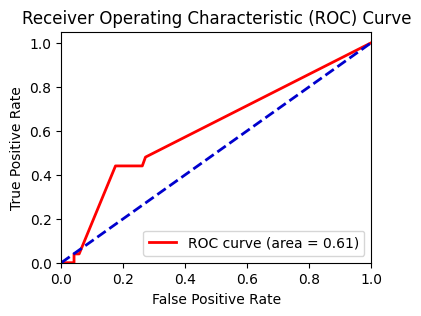

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

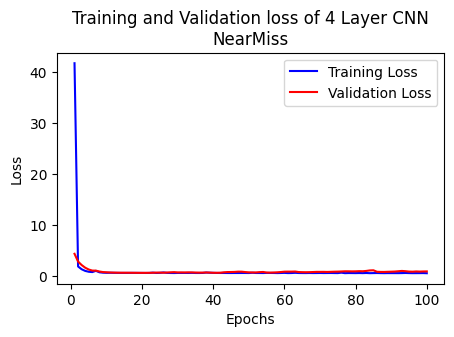

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nNearMiss', model_4_near_miss_history)

### EditedNearestNeighbours

In [ ]:
model_4_enn_history = model_4_layer.fit(X_enn_scaled, y_enn, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.6400 - val_accuracy: 0.9491 - val_loss: 0.2284
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.2357 - val_accuracy: 0.9511 - val_loss: 0.2018
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.2179 - val_accuracy: 0.9511 - val_loss: 0.1966
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0.2312 - val_accuracy: 0.9511 - val_loss: 0.1930
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.2031 - val_accuracy: 0.9511 - val_loss: 0.1905
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9424 - loss: 0.2112 - val_accuracy: 0.9511 - val_loss: 0.1897
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9451 - loss: 0.2042 - val_accuracy: 0.9511 - val_loss: 0.1883
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.1918 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 1.9856 
Test Loss: 2.0527
Test Accuracy: 0.9511


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       1.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.98      0.50      0.49       511
weighted avg       0.95      0.95      0.93       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


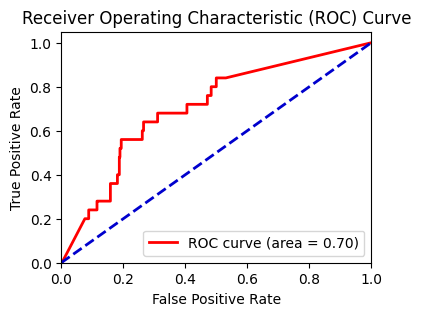

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

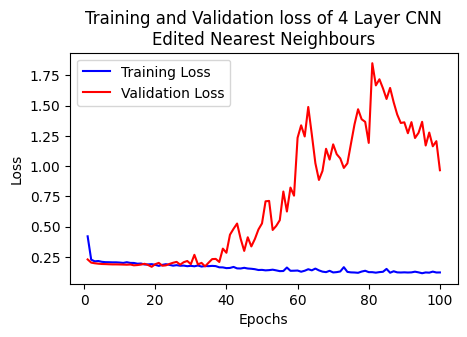

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nEdited Nearest Neighbours', model_4_enn_history)

### SMOTETomek

In [ ]:
model_4_smote_tomek_history = model_4_layer.fit(X_smote_tomek_scaled, y_smote_tomek, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7390 - loss: 1.3800 - val_accuracy: 0.7436 - val_loss: 0.5236
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.4294 - val_accuracy: 0.7417 - val_loss: 0.5135
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3769 - val_accuracy: 0.7417 - val_loss: 0.5446
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3903 - val_accuracy: 0.7613 - val_loss: 0.5812
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8675 - loss: 0.3557 - val_accuracy: 0.7339 - val_loss: 0.5621
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8688 - loss: 0.3541 - val_accuracy: 0.7417 - val_loss: 0.5828
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3500 - val_accuracy: 0.6614 - val_loss: 0.6692
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3446 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 1.3856 
Test Loss: 1.4335
Test Accuracy: 0.7143


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       486
           1       0.08      0.48      0.14        25

    accuracy                           0.71       511
   macro avg       0.52      0.60      0.48       511
weighted avg       0.92      0.71      0.80       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


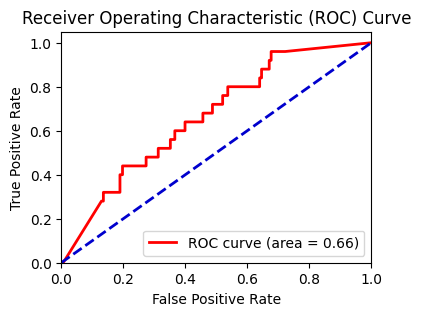

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

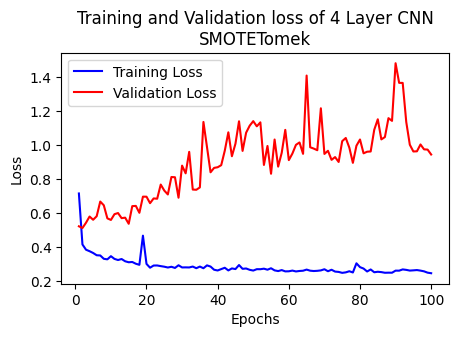

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nSMOTETomek', model_4_smote_tomek_history)

### SMOTEENN

In [ ]:
model_4_smoteenn_history = model_4_layer.fit(X_smoteenn_scaled, y_smoteenn, epochs=100, batch_size=32, validation_data=(X_val_scaled, Y_val_cnn))

Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9425 - loss: 0.1703 - val_accuracy: 0.7573 - val_loss: 1.2262
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1477 - val_accuracy: 0.7691 - val_loss: 1.3043
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.1469 - val_accuracy: 0.7456 - val_loss: 1.2330
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.1506 - val_accuracy: 0.7436 - val_loss: 1.2818
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1566 - val_accuracy: 0.7476 - val_loss: 1.2871
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1595 - val_accuracy: 0.7221 - val_loss: 1.3047
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9468 - loss: 0.1519 - val_accuracy: 0.7456 - val_loss: 1.1630
Epoch 8/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1601 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_4_layer.evaluate(X_test_scaled, Y_test_cnn)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6957 - loss: 3.1683 
Test Loss: 2.9062
Test Accuracy: 0.6928


In [ ]:
print(classification_report(Y_test_cnn, np.round(model_4_layer.predict(X_test_scaled)), zero_division=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.96      0.71      0.81       486
           1       0.07      0.44      0.12        25

    accuracy                           0.69       511
   macro avg       0.52      0.57      0.47       511
weighted avg       0.92      0.69      0.78       511



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


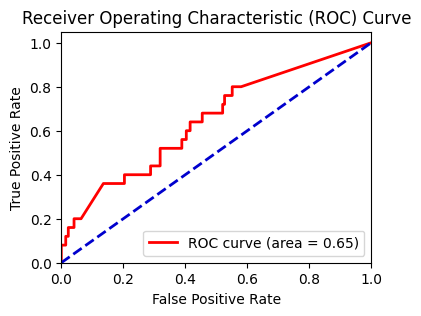

In [ ]:
plot_roc_curve(model_4_layer.predict(X_test_scaled), Y_test_cnn)

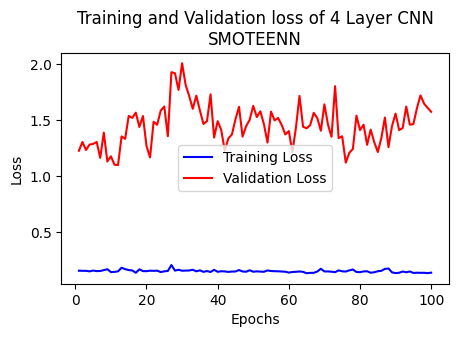

In [ ]:
plot_training_history('Training and Validation loss of 4 Layer CNN\nSMOTEENN', model_4_smoteenn_history)